## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [5]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5]
NUM_NEURONS=[[512, 256, 128],[512, 256, 256, 128, 128, 64]]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for item in NUM_NEURONS:
    for ratio in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("layers: %.0f >>> drp_ratio: %.2f" %(len(item), ratio))
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=item, drp_ratio=ratio)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                batch_size=BATCH_SIZE, 
                validation_data=(x_test, y_test), 
                shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "layers: %.0f >>> drp_ratio: %.2f" %(len(item), ratio)
        results[exp_name_tag] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}

layers: 3 >>> drp_ratio: 0.25
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (N

Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5160 - accuracy: 0.4541 - val_loss: 1.4567 - val_accuracy: 0.4845
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5083 - accuracy: 0.4576 - val_loss: 1.4764 - val_accuracy: 0.4783
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5092 - accuracy: 0.4577 - val_loss: 1.4802 - val_accuracy: 0.4840
layers: 3 >>> drp_ratio: 0.50
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_____________________________________________________________

Epoch 45/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9413 - accuracy: 0.2734 - val_loss: 1.9584 - val_accuracy: 0.2795
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9410 - accuracy: 0.2734 - val_loss: 2.0231 - val_accuracy: 0.2703
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9323 - accuracy: 0.2760 - val_loss: 2.0078 - val_accuracy: 0.2727
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9342 - accuracy: 0.2759 - val_loss: 1.9860 - val_accuracy: 0.2853
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9293 - accuracy: 0.2765 - val_loss: 2.0120 - val_accuracy: 0.2690
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9447 - accuracy: 0.2754 - val_loss: 2.0182 - val_accuracy: 0.2748
layers: 6 >>> drp_ratio: 0.25
Model: "model"
_________________________________________________________________
Layer (type)             

196/196 [==============================] - 4s 18ms/step - loss: 1.6910 - accuracy: 0.3907 - val_loss: 1.6098 - val_accuracy: 0.4274
Epoch 37/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6861 - accuracy: 0.3920 - val_loss: 1.6189 - val_accuracy: 0.4257
Epoch 38/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6902 - accuracy: 0.3869 - val_loss: 1.6570 - val_accuracy: 0.4110
Epoch 39/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6825 - accuracy: 0.3917 - val_loss: 1.6413 - val_accuracy: 0.4181
Epoch 40/50
196/196 [==============================] - 4s 18ms/step - loss: 1.6867 - accuracy: 0.3923 - val_loss: 1.6037 - val_accuracy: 0.4356
Epoch 41/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6749 - accuracy: 0.3970 - val_loss: 1.6215 - val_accuracy: 0.4287
Epoch 42/50
196/196 [==============================] - 4s 19ms/step - loss: 1.6725 - accuracy: 0.3971 - val_loss: 1.6184 - val_accuracy: 0.4250
Epoc

196/196 [==============================] - 4s 19ms/step - loss: 2.1271 - accuracy: 0.1658 - val_loss: 2.2527 - val_accuracy: 0.1265
Epoch 28/50
196/196 [==============================] - 4s 19ms/step - loss: 2.1229 - accuracy: 0.1689 - val_loss: 2.2897 - val_accuracy: 0.1105
Epoch 29/50
196/196 [==============================] - 4s 19ms/step - loss: 2.1237 - accuracy: 0.1691 - val_loss: 2.2703 - val_accuracy: 0.1190
Epoch 30/50
196/196 [==============================] - 4s 19ms/step - loss: 2.1283 - accuracy: 0.1679 - val_loss: 2.2558 - val_accuracy: 0.1233
Epoch 31/50
196/196 [==============================] - 4s 19ms/step - loss: 2.1237 - accuracy: 0.1708 - val_loss: 2.2634 - val_accuracy: 0.1219
Epoch 32/50
196/196 [==============================] - 4s 19ms/step - loss: 2.1226 - accuracy: 0.1729 - val_loss: 2.2995 - val_accuracy: 0.1083
Epoch 33/50
196/196 [==============================] - 4s 19ms/step - loss: 2.1187 - accuracy: 0.1714 - val_loss: 2.2468 - val_accuracy: 0.1193
Epoc

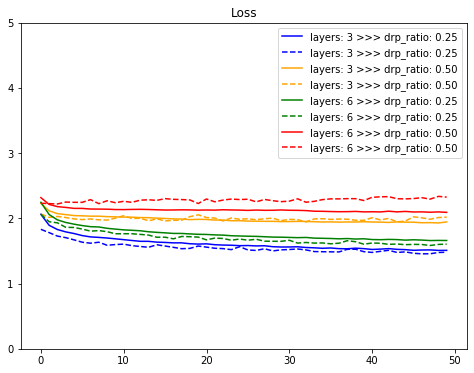

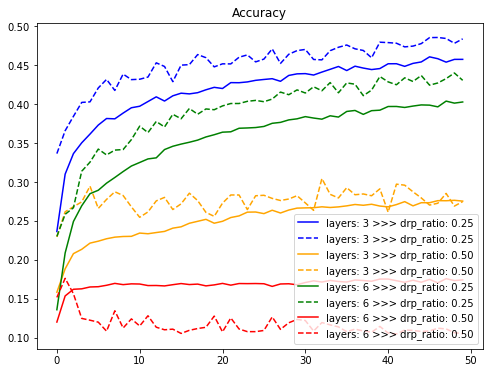

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["Blue", "Orange", "Green", "Red", "Purple", "Brown" ,"pink" , "gray"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()